# California Housing Price Prediction .
DESCRIPTION

Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

# Import required modules

In [254]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

# 1. Load the data :

In [255]:
#Read the “housing.csv” file from the folder into the program.
df = pd.read_excel('./resources/1553768847_housing.xlsx')
#Print first few rows of this data.
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [256]:
#Extract input (X) and output (Y) data from the dataset
X = df.drop('median_house_value', axis=1)
Y = df[['median_house_value']]

In [257]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [258]:
Y

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


# 2. Handle missing values :

In [259]:
#list null values
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

column "total_bedrooms" has null values

In [260]:
#Fill the missing values with the mean of the respective column.
def handle_missing_values(column : pd.Series):
    try:
        if column.isnull().sum() > 0:
            column.fillna(column.mean(), inplace=True)
    except Exception as error:
        print(error)
X.apply(handle_missing_values)

longitude             None
latitude              None
housing_median_age    None
total_rooms           None
total_bedrooms        None
population            None
households            None
median_income         None
ocean_proximity       None
dtype: object

In [261]:
#no Null value should be present in entire X
assert(X.isnull().sum().sum() == 0)
#list null values
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

# 3. Encode categorical data

In [262]:
#Convert categorical column "ocean_proximity" to numerical data.
label_encoder = preprocessing.LabelEncoder()
X['ocean_proximity'] = label_encoder.fit_transform(X['ocean_proximity'])
X['ocean_proximity'].value_counts().sort_index()
#ocean_proximity values are now converted to numerical values from 0 to 4

0    9136
1    6551
2       5
3    2290
4    2658
Name: ocean_proximity, dtype: int64

# 4. Split the dataset :

In [263]:
#Split the data into 80% training dataset and 20% test dataset.
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2)

# 5. Standardize data :

In [264]:
#Standardize training and test datasets using minmax scalar.
x_scalar = preprocessing.StandardScaler()
# converting 2D array to dataframe for better readabilty
X_train_scaled = pd.DataFrame(data = x_scalar.fit_transform(x_train), columns= x_train.columns)
X_test_scaled  = pd.DataFrame(data = x_scalar.transform(x_test), columns= x_test.columns)
X_train_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.139487,0.826800,0.349134,-0.832198,-0.859283,-0.570479,-0.874234,0.655551,-0.818940
1,0.373885,-0.628273,-0.683190,0.481536,0.352512,0.403703,0.516563,0.156877,-0.818940
2,1.232961,-1.440297,-1.636105,1.800815,1.636582,2.982941,1.796097,0.050353,1.997186
3,-0.650014,1.009857,1.302048,-0.931086,-0.984558,-1.034123,-0.993445,-1.128308,-0.114908
4,0.134143,-0.614191,-0.286143,-0.713440,-0.837601,-0.640380,-0.752374,0.022985,1.997186


In [265]:
y_scalar = preprocessing.StandardScaler()
# converting 2D array to dataframe for better readabilty
y_train_scaled = pd.DataFrame(data = y_scalar.fit_transform(y_train), columns= y_train.columns)
y_test_scaled  = pd.DataFrame(y_scalar.transform(y_test), columns= y_test.columns)
y_train_scaled.head()

,median_house_value
0,-0.090759
1,-0.082104
2,-0.535630
3,-0.838557
4,-0.117590


# 6. Perform Linear Regression :

In [266]:
#Perform Linear Regression on training data.
lnr_regression1 = LinearRegression()
lnr_regression1.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [267]:
scaled_predicted_y = lnr_regression1.predict(X_test_scaled)
# inverse transform to get actual price
pred1 = y_scalar.inverse_transform(scaled_predicted_y)

In [268]:
print('root mean squared error of model: ', np.sqrt(mean_squared_error(pred1, y_test)))

root mean squared error of model:  69446.38184756695


In [269]:
result_df = pd.DataFrame()
result_df['original_house_value'] = y_test
result_df['predicted_house_value'] = pred1
result_df.head()

,original_house_value,predicted_house_value
5472,363200,268908.375007
6919,500001,456933.304080
8111,190400,199636.903315
2234,54000,63562.739837
10830,224100,279370.530240


In [270]:
result_df.describe()

,original_house_value,predicted_house_value
count,4128.000000,4128.000000
mean,209134.178537,207976.359468
std,114791.153972,93030.236858
min,22500.000000,-71597.960648
25%,123800.000000,145975.178192
50%,183350.000000,202659.653845
75%,266725.000000,262305.119918
max,500001.000000,692340.318865


<AxesSubplot:title={'center':'House price prediction using all metrics'}, xlabel='Original price', ylabel='Predicted price'>

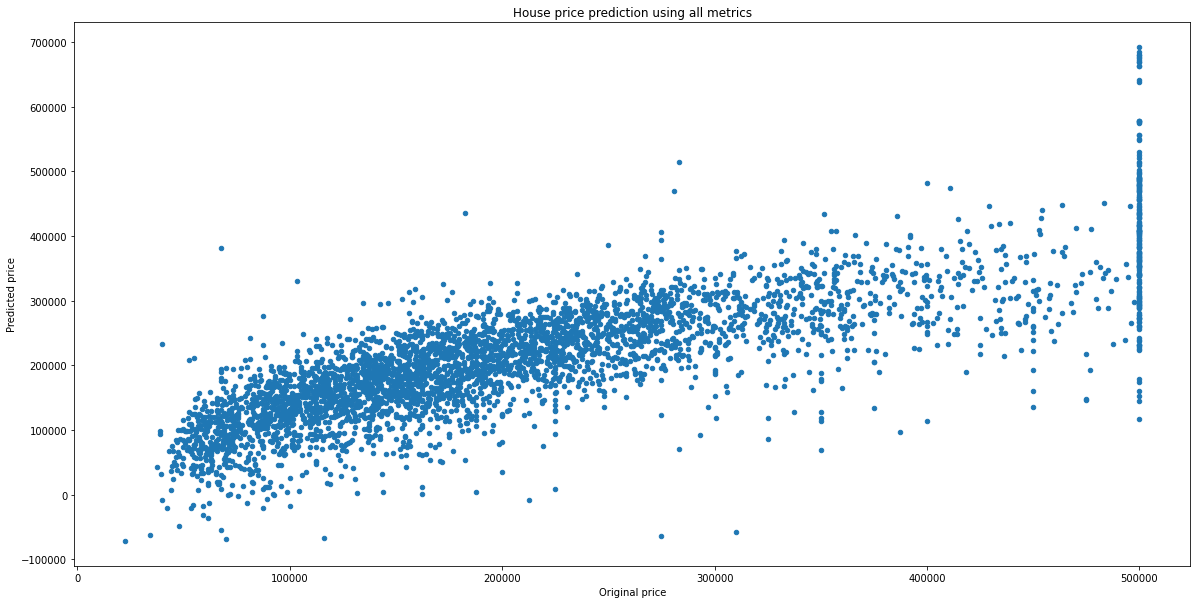

In [271]:
result_df.plot.scatter('original_house_value', 'predicted_house_value', xlabel='Original price', ylabel='Predicted price', title='House price prediction using all metrics', figsize=(20,10))

Above figure shows that our model works well for lower house prices.
However its not well suited to predict the price if they are on higher end.

# 7. Perform Linear Regression with one independent variable :

In [272]:
lnr_regression2 = LinearRegression()
# seperate median_income data from dataframe. This is already scaled so no need to scale it again.
lnr_regression2.fit(X_train_scaled[['median_income']], y_train_scaled)

LinearRegression()

In [273]:
scaled_pred2 = lnr_regression2.predict(X_test_scaled[['median_income']])
pred2 = y_scalar.inverse_transform(scaled_pred2)

In [274]:
print('root mean squared error of second model: ', np.sqrt(mean_squared_error(pred2, y_test)))

root mean squared error of second model:  83785.81254685018


In [275]:
result_df1 = pd.DataFrame()
result_df1['original_house_value'] = y_test
result_df1['predicted_house_value'] = pred2
result_df1.head()

,original_house_value,predicted_house_value
5472,363200,219841.886079
6919,500001,497151.485384
8111,190400,158331.144559
2234,54000,126180.278709
10830,224100,274903.177320


In [276]:
result_df1.describe()

,original_house_value,predicted_house_value
count,4128.000000,4128.000000
mean,209134.178537,207971.488864
std,114791.153972,79564.748386
min,22500.000000,65365.189396
25%,123800.000000,153160.898112
50%,183350.000000,193273.000588
75%,266725.000000,245348.435218
max,500001.000000,673021.582765


<AxesSubplot:title={'center':'House price prediction median_income'}, xlabel='Original price', ylabel='Predicted price'>

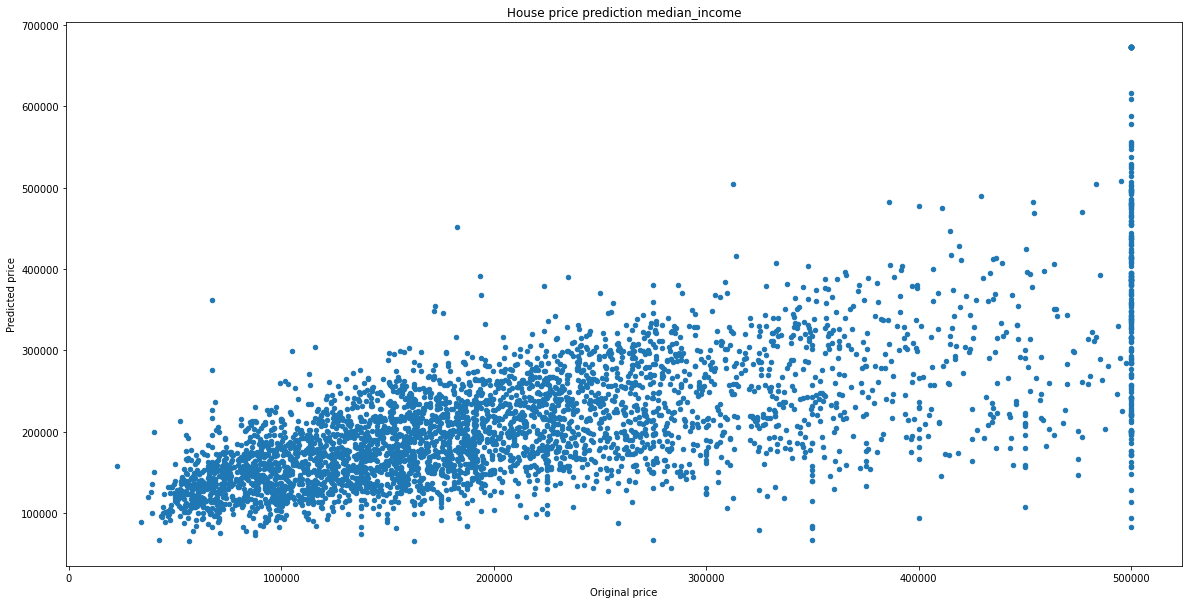

In [277]:
result_df1.plot.scatter('original_house_value', 'predicted_house_value', xlabel='Original price', ylabel='Predicted price', title='House price prediction median_income', figsize=(20,10))

Model using median_income is worse than previous model as its more widely scattered

In [302]:
hist_bins = np.arange(start=20000, stop = 500000, step = 5000)

<AxesSubplot:ylabel='Frequency'>

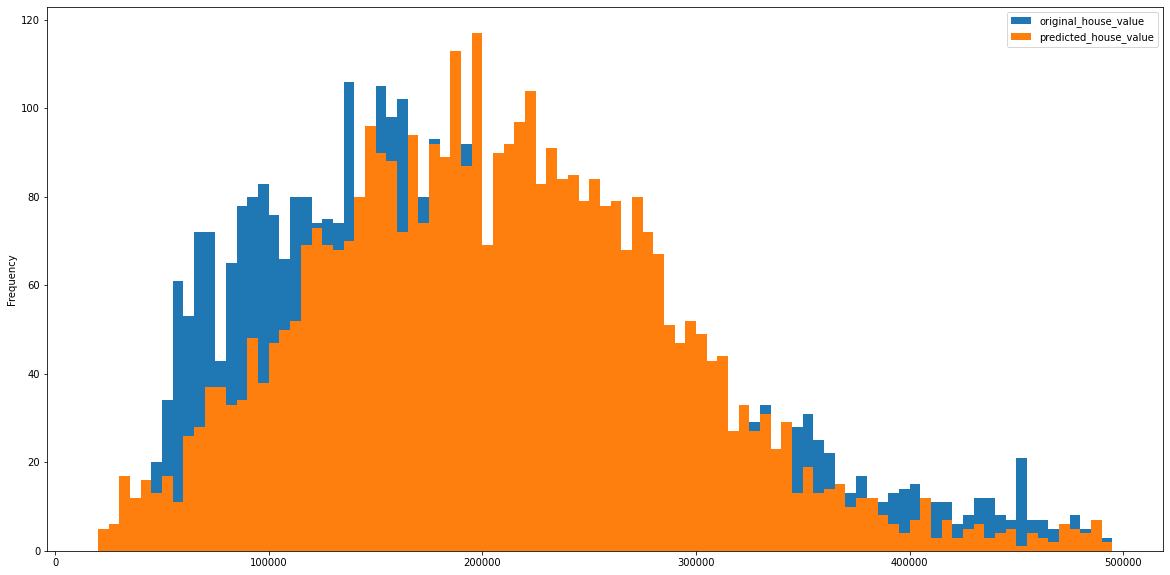

In [303]:
result_df.plot.hist(bins = hist_bins, figsize=(20,10))

<AxesSubplot:ylabel='Frequency'>

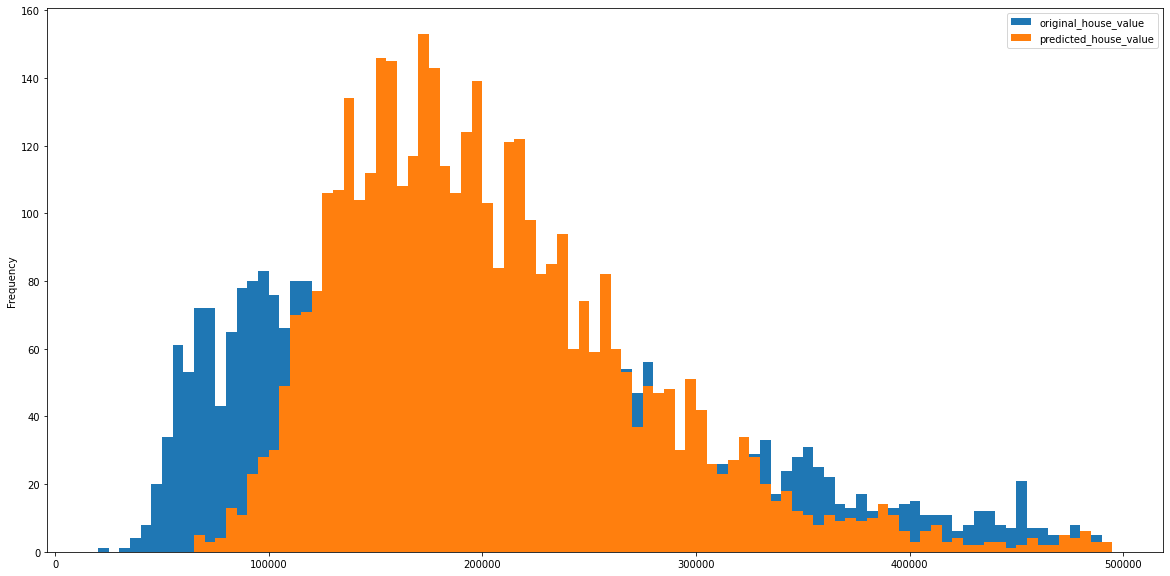

In [306]:
result_df1.plot.hist(bins = hist_bins, figsize=(20,10))